In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today()
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544690
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [ ]:
df.tail()

In [ ]:
df = df.reset_index()
df.head()

In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

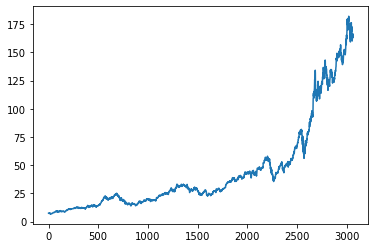

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3060,165.419998,162.429993,163.059998,165.119995,94869100.0
3061,166.600006,161.970001,164.699997,163.199997,83474400.0
3062,167.360001,162.949997,164.389999,166.559998,79724800.0
3063,168.910004,165.550003,168.470001,166.229996,76335600.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3060    163.154700
3061    163.366700
3062    163.599400
3063    163.832701
3064    164.036301
Name: Close, Length: 3065, dtype: float64

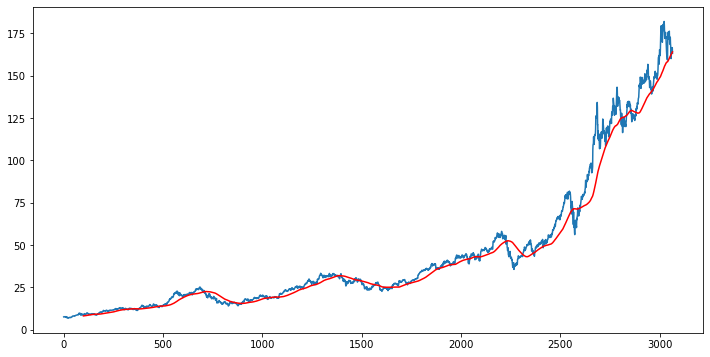

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3060    152.03235
3061    152.21110
3062    152.41255
3063    152.61945
3064    152.81185
Name: Close, Length: 3065, dtype: float64

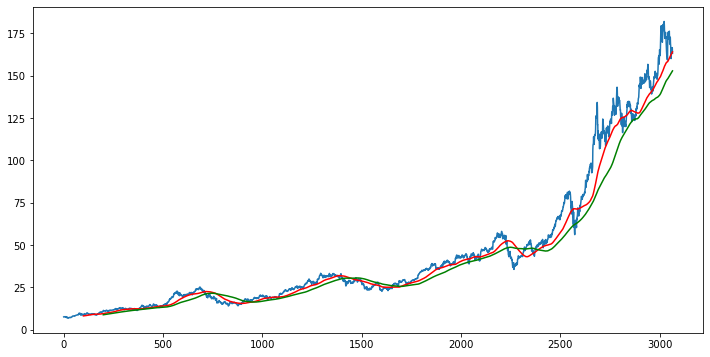

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3065, 5)

In [13]:
# spliting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2145, 1)
(920, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2145,46.970001
2146,47.757500
2147,47.832500
2148,47.727501
2149,47.862499


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01602317],
       [0.01883667],
       [0.01915406],
       ...,
       [0.96391353],
       [0.97958505],
       [0.97820406]])

In [18]:
data_training_array.shape

(2145, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2045, 100, 1)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [24]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
64/64 [==============================] - 11s 125ms/step - loss: 0.0442
Epoch 2/50
64/64 [==============================] - 8s 120ms/step - loss: 0.0073
Epoch 3/50
64/64 [==============================] - 8s 122ms/step - loss: 0.0080
Epoch 4/50
64/64 [==============================] - 8s 124ms/step - loss: 0.0068
Epoch 5/50
64/64 [==============================] - 8s 128ms/step - loss: 0.0058
Epoch 6/50
64/64 [==============================] - 7s 116ms/step - loss: 0.0058
Epoch 7/50
64/64 [==============================] - 8s 124ms/step - loss: 0.0058
Epoch 8/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0053
Epoch 9/50
64/64 [==============================] - 8s 125ms/step - loss: 0.0052
Epoch 10/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0050
Epoch 11/50
64/64 [==============================] - 8s 127ms/step - loss: 0.0047
Epoch 12/50
64/64 [==============================] - 8s 123ms/step - loss: 0.0043
Epoch 13/50
64/64 [=====

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2145,46.970001
2146,47.757500
2147,47.832500
2148,47.727501
2149,47.862499


In [29]:
data_training.tail(100)

,Close
2045,43.247501
2046,43.107498
2047,42.962502
2048,42.767502
2049,43.125000
...,...
2140,45.980000
2141,46.349998
2142,46.992500
2143,47.645000


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [32]:
final_df.head()

,Close
0,43.247501
1,43.107498
2,42.962502
3,42.767502
4,43.125000


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05257319],
       [0.05161729],
       [0.0506273 ],
       ...,
       [0.89451226],
       [0.89225911],
       [0.87136641]])

In [34]:
input_data.shape

(1020, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(920, 100, 1)
(920,)


In [37]:
# making predictions

y_predicted = model.predict(x_test)

In [38]:
y_predicted.shape

(920, 1)

In [39]:
y_test

array([0.07798925, 0.08336605, 0.08387813, 0.08316122, 0.08408295,
       0.08229068, 0.08481694, 0.08406589, 0.08435606, 0.08672868,
       0.08983529, 0.08879407, 0.0832807 , 0.0814543 , 0.08210292,
       0.10123752, 0.11129129, 0.11231545, 0.11415893, 0.11081335,
       0.11105232, 0.11383461, 0.11153025, 0.11381752, 0.11531962,
       0.11615602, 0.12141334, 0.12868482, 0.12506616, 0.12434923,
       0.12436631, 0.12511736, 0.126261  , 0.12929931, 0.13230349,
       0.13790219, 0.14140138, 0.14583939, 0.14708543, 0.14454211,
       0.13810704, 0.13503457, 0.12996501, 0.13938723, 0.13464199,
       0.14375694, 0.13937014, 0.1291969 , 0.1298114 , 0.13003328,
       0.13286677, 0.12882138, 0.13416403, 0.13655373, 0.13353247,
       0.14126483, 0.14261331, 0.14520781, 0.1486558 , 0.15341813,
       0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443

In [40]:
y_predicted

array([[0.17421156],
       [0.17407903],
       [0.17406982],
       [0.1741838 ],
       [0.17440996],
       [0.17473352],
       [0.17512928],
       [0.17557776],
       [0.17605832],
       [0.17655227],
       [0.17705089],
       [0.17755908],
       [0.17807868],
       [0.17859098],
       [0.17906886],
       [0.1794895 ],
       [0.17990223],
       [0.18039846],
       [0.18105961],
       [0.18194152],
       [0.18305299],
       [0.18437028],
       [0.18585564],
       [0.18745133],
       [0.18910024],
       [0.1907502 ],
       [0.19235642],
       [0.19389929],
       [0.19539145],
       [0.19683683],
       [0.19823031],
       [0.19956174],
       [0.20082058],
       [0.20199937],
       [0.2031017 ],
       [0.20414236],
       [0.20515469],
       [0.20617975],
       [0.2072632 ],
       [0.2084386 ],
       [0.20970924],
       [0.21103421],
       [0.21234877],
       [0.21357383],
       [0.21466513],
       [0.21558407],
       [0.21633767],
       [0.216

In [41]:
scaler.scale_

array([0.00682769])

In [42]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

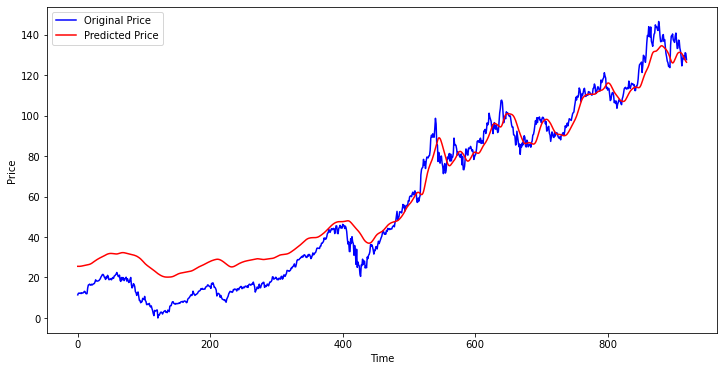

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()